In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [224]:
# combine all the data/usda_* into one dataframe
usda = pd.concat([pd.read_csv(f'data/usda_data_{year}.csv')  for year in range(1950, 2024)])

# combine all the data/weather_* into one dataframe
weather = pd.concat([pd.read_csv(f'data/weather_data_{year}.csv') for year in range(2000, 2021)])


In [225]:
usda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5114 entries, 0 to 57
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   class_desc             5114 non-null   object 
 1   state_alpha            5114 non-null   object 
 2   country_code           5114 non-null   int64  
 3   commodity_desc         5114 non-null   object 
 4   country_name           5114 non-null   object 
 5   short_desc             5114 non-null   object 
 6   freq_desc              5114 non-null   object 
 7   watershed_code         5114 non-null   int64  
 8   watershed_desc         0 non-null      float64
 9   year                   5114 non-null   int64  
 10  load_time              5114 non-null   object 
 11  begin_code             5114 non-null   int64  
 12  sector_desc            5114 non-null   object 
 13  CV (%)                 237 non-null    float64
 14  statisticcat_desc      5114 non-null   object 
 15  asd_code   

In [226]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182631 entries, 0 to 9220
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         182631 non-null  object 
 1   TMAX         174871 non-null  float64
 2   TMIN         174628 non-null  float64
 3   PRCP         181173 non-null  float64
 4   state_ansi   182631 non-null  int64  
 5   county_ansi  181658 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.8+ MB


In [227]:
# what is the average value in udsa data for each year
usda.groupby('year')['Value'].mean()


year
1950     32.367073
1951     35.701220
1952     44.045122
1953     40.570732
1954     37.290244
           ...    
2019    138.642857
2020    143.606557
2021    164.943103
2022    151.955000
2023    158.160345
Name: Value, Length: 74, dtype: float64

I'll select the columns that I need for analysis. I will focus on year, county_name and Value.

In [228]:
# what is the average value in udsa data for each year
usda.groupby('year')['Value'].sum()

year
1950    2654.1
1951    2927.5
1952    3611.7
1953    3326.8
1954    3057.8
         ...  
2019    7764.0
2020    8760.0
2021    9566.7
2022    9117.3
2023    9173.3
Name: Value, Length: 74, dtype: float64

In [229]:
usda['year'] = pd.to_datetime(usda['year'],
               format='%Y')
usda_subset = usda[['year','county_name','Value']]

In [230]:
usda_subset['county_name'].nunique() #85 Michigan has 83

85

The result is that the data set has 85 and Michigan only has 83. The additional two are 'OTHER COUNTIES' and 'OTHER (COMBINED) COUNTIES'.

In [231]:
usda_subset_other_combined = usda_subset[usda_subset['county_name'] == 'OTHER (COMBINED) COUNTIES']
usda_subset_other_combined

,year,county_name,Value
0,1958-01-01,OTHER (COMBINED) COUNTIES,9.0
0,1960-01-01,OTHER (COMBINED) COUNTIES,46.7
1,1960-01-01,OTHER (COMBINED) COUNTIES,41.0
4,1960-01-01,OTHER (COMBINED) COUNTIES,42.9
0,1961-01-01,OTHER (COMBINED) COUNTIES,52.5
...,...,...,...
10,2019-01-01,OTHER (COMBINED) COUNTIES,110.3
17,2019-01-01,OTHER (COMBINED) COUNTIES,137.1
21,2019-01-01,OTHER (COMBINED) COUNTIES,143.2
31,2019-01-01,OTHER (COMBINED) COUNTIES,140.4


There are 144 records that contain 'OTHER (COMBINED) COUNTIES'.

In [232]:
usda_subset_other = usda_subset[usda_subset['county_name'] == 'OTHER COUNTIES']
usda_subset_other

,year,county_name,Value
60,2020-01-01,OTHER COUNTIES,151.0
57,2021-01-01,OTHER COUNTIES,150.2
59,2022-01-01,OTHER COUNTIES,163.2
57,2023-01-01,OTHER COUNTIES,166.3


	year	county_name	Value
60	2020-01-01	OTHER COUNTIES	151.0
57	2021-01-01	OTHER COUNTIES	150.2
59	2022-01-01	OTHER COUNTIES	163.2
57	2023-01-01	OTHER COUNTIES	166.3

There are 4 records (years) that contain 'OTHER COUNTIES'. We will focus on the year 2020.

In [233]:
usda_other = usda[usda['county_name'] == 'OTHER COUNTIES']
usda_other

,class_desc,state_alpha,country_code,commodity_desc,country_name,short_desc,freq_desc,watershed_code,watershed_desc,year,...,asd_desc,source_desc,util_practice_desc,zip_5,state_ansi,domain_desc,county_code,location_desc,state_fips_code,state_name
60,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2020-01-01,...,NaN,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, OTHER COUNTIES",26,MICHIGAN
57,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2021-01-01,...,NaN,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, OTHER COUNTIES",26,MICHIGAN
59,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2022-01-01,...,NaN,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, OTHER COUNTIES",26,MICHIGAN
57,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2023-01-01,...,NaN,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, OTHER COUNTIES",26,MICHIGAN


The asd_desc is null for all 4 records. location_desc for all 4 records is "MICHIGAN, OTHER COUNTIES".

In [234]:
usda_subset_2020=usda_subset[usda_subset['year'] == '2020-01-01']

In [235]:
usda_subset_2020['county_name'].nunique()

61

There are 61 counties in the data set for 2020.

In [236]:
usda_subset_2020['county_name'].unique()

array(['DELTA', 'DICKINSON', 'MENOMINEE', 'ANTRIM', 'BENZIE',
       'CHARLEVOIX', 'EMMET', 'GRAND TRAVERSE', 'LEELANAU', 'MANISTEE',
       'WEXFORD', 'ALCONA', 'ALPENA', 'IOSCO', 'OGEMAW', 'OTSEGO',
       'PRESQUE ISLE', 'MASON', 'MUSKEGON', 'NEWAYGO', 'OCEANA',
       'GLADWIN', 'ISABELLA', 'MECOSTA', 'MIDLAND', 'MONTCALM', 'ARENAC',
       'BAY', 'HURON', 'SAGINAW', 'SANILAC', 'TUSCOLA', 'ALLEGAN',
       'BERRIEN', 'CASS', 'KALAMAZOO', 'KENT', 'OTTAWA', 'VAN BUREN',
       'BARRY', 'BRANCH', 'CALHOUN', 'CLINTON', 'EATON', 'HILLSDALE',
       'INGHAM', 'IONIA', 'JACKSON', 'ST JOSEPH', 'SHIAWASSEE', 'GENESEE',
       'LAPEER', 'LENAWEE', 'LIVINGSTON', 'MACOMB', 'MONROE', 'OAKLAND',
       'ST CLAIR', 'WASHTENAW', 'WAYNE', 'OTHER COUNTIES'], dtype=object)

array(['DELTA', 'DICKINSON', 'MENOMINEE', 'ANTRIM', 'BENZIE',
       'CHARLEVOIX', 'EMMET', 'GRAND TRAVERSE', 'LEELANAU', 'MANISTEE',
       'WEXFORD', 'ALCONA', 'ALPENA', 'IOSCO', 'OGEMAW', 'OTSEGO',
       'PRESQUE ISLE', 'MASON', 'MUSKEGON', 'NEWAYGO', 'OCEANA',
       'GLADWIN', 'ISABELLA', 'MECOSTA', 'MIDLAND', 'MONTCALM', 'ARENAC',
       'BAY', 'HURON', 'SAGINAW', 'SANILAC', 'TUSCOLA', 'ALLEGAN',
       'BERRIEN', 'CASS', 'KALAMAZOO', 'KENT', 'OTTAWA', 'VAN BUREN',
       'BARRY', 'BRANCH', 'CALHOUN', 'CLINTON', 'EATON', 'HILLSDALE',
       'INGHAM', 'IONIA', 'JACKSON', 'ST JOSEPH', 'SHIAWASSEE', 'GENESEE',
       'LAPEER', 'LENAWEE', 'LIVINGSTON', 'MACOMB', 'MONROE', 'OAKLAND',
       'ST CLAIR', 'WASHTENAW', 'WAYNE', 'OTHER COUNTIES'], dtype=object)

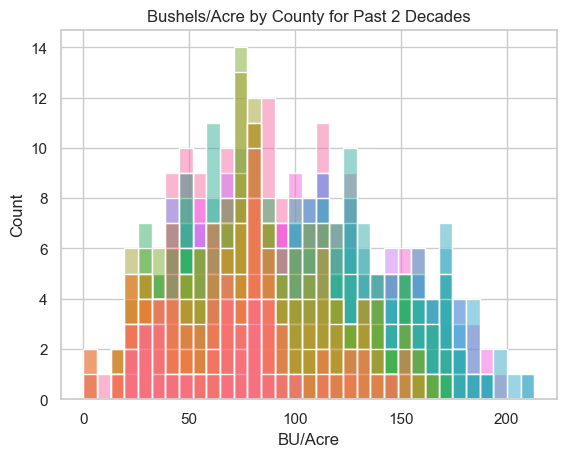

In [237]:
import matplotlib.pyplot as plt
sns.histplot(data=usda_subset, x="Value", hue="county_name", legend=False)
plt.xlabel('BU/Acre')
plt.title('Bushels/Acre by County for Past 2 Decades')
plt.show()

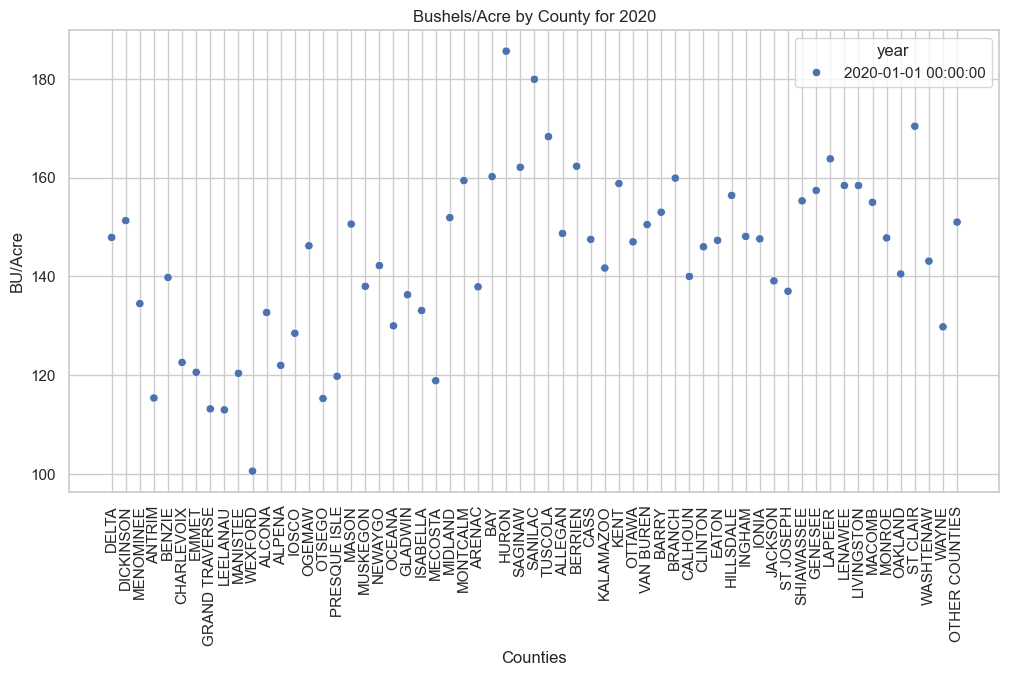

In [238]:
# Adjust figure size for better readability
plt.figure(figsize=(12, 6))

# Create the scatter plot
g = sns.scatterplot(data=usda_subset_2020, x="county_name", y="Value", hue="year")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Counties')
plt.ylabel('BU/Acre')
plt.title('Bushels/Acre by County for 2020')

# Adjust the legend positioning
#g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# Display the plot
plt.show()

It appears that perhaps the "Other Counties" was a dumping ground for smaller quanities collected over several counties. There is only one dot respresenting the one entry for the year 2020.

Was there really 3 entries for 1960 for "Other (Combined) Counties"? A dataset containing the 1960 entries will be created and investigated.

In [239]:
usda_subset_1960=usda_subset[usda_subset['year'] == '1960-01-01']

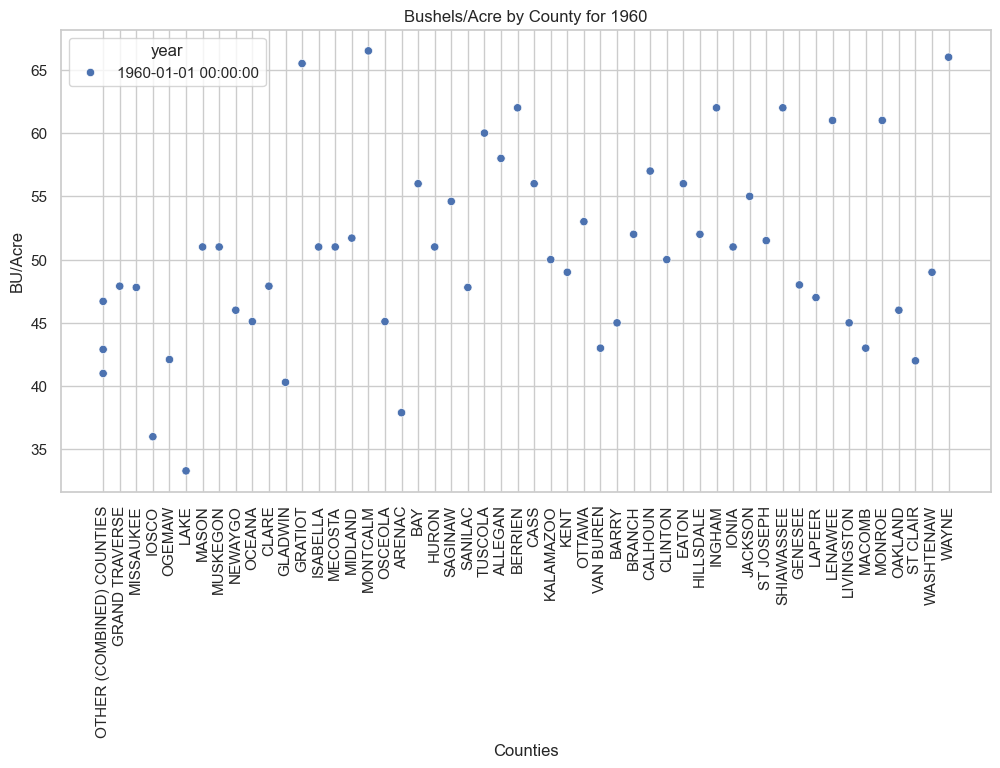

In [240]:
# Adjust figure size for better readability
plt.figure(figsize=(12, 6))

# Create the scatter plot
g = sns.scatterplot(data=usda_subset_1960, x="county_name", y="Value", hue="year")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Counties')
plt.ylabel('BU/Acre')
plt.title('Bushels/Acre by County for 1960')

# Adjust the legend positioning
#g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# Display the plot
plt.show()

Sure enough there are three dots over the "Other (Combined) Counties" mark. What does it look like when we look at the entered values?

In [241]:
usda_1960 = usda[(usda['year'] == '1960-01-01') & (usda['county_name'] == 'OTHER (COMBINED) COUNTIES')]
usda_1960

,class_desc,state_alpha,country_code,commodity_desc,country_name,short_desc,freq_desc,watershed_code,watershed_desc,year,...,asd_desc,source_desc,util_practice_desc,zip_5,state_ansi,domain_desc,county_code,location_desc,state_fips_code,state_name
0,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,1960-01-01,...,UPPER PENINSULA,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, UPPER PENINSULA, OTHER (COMBINED) CO...",26,MICHIGAN
1,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,1960-01-01,...,NORTHWEST,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, NORTHWEST, OTHER (COMBINED) COUNTIES",26,MICHIGAN
4,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,1960-01-01,...,NORTHEAST,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, NORTHEAST, OTHER (COMBINED) COUNTIES",26,MICHIGAN


The 3 entries for 1960 have the following asd_desc: "UPPER PENINSULA", "NORTHWEST", and "NORTHEAST". The location_desc has these entries: "MICHIGAN, UPPER PENINSULA, OTHER (COMBINED) COUNTIES", "MICHIGAN, NORTHWEST, OTHER (COMBINED) COUNTIES", and "MICHIGAN, NORTHEAST, OTHER (COMBINED) COUNTIES".

In [242]:
grouped_df = usda_subset_1960.groupby('county_name')['Value'].sum().reset_index()
print(grouped_df)

                  county_name  Value
0                     ALLEGAN   58.0
1                      ARENAC   37.9
2                       BARRY   45.0
3                         BAY   56.0
4                     BERRIEN   62.0
5                      BRANCH   52.0
6                     CALHOUN   57.0
7                        CASS   56.0
8                       CLARE   47.9
9                     CLINTON   50.0
10                      EATON   56.0
11                    GENESEE   48.0
12                    GLADWIN   40.3
13             GRAND TRAVERSE   47.9
14                    GRATIOT   65.5
15                  HILLSDALE   52.0
16                      HURON   51.0
17                     INGHAM   62.0
18                      IONIA   51.0
19                      IOSCO   36.0
20                   ISABELLA   51.0
21                    JACKSON   55.0
22                  KALAMAZOO   50.0
23                       KENT   49.0
24                       LAKE   33.3
25                     LAPEER   47.0
2

The total Value for 1960 "OTHER (COMBINED) COUNTIES" was 130.6
A similiar dumping ground value when compared to the single "OTHER COUNTIES" in 2020.

2019 seemed to have a lot of entries for "OTHER (COMBINED) COUNTIES". What is going on?

In [243]:
usda_2019 = usda[(usda['year'] == '2019-01-01') & (usda['county_name'] == 'OTHER (COMBINED) COUNTIES')]
usda_2019

,class_desc,state_alpha,country_code,commodity_desc,country_name,short_desc,freq_desc,watershed_code,watershed_desc,year,...,asd_desc,source_desc,util_practice_desc,zip_5,state_ansi,domain_desc,county_code,location_desc,state_fips_code,state_name
0,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,...,UPPER PENINSULA,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, UPPER PENINSULA, OTHER (COMBINED) CO...",26,MICHIGAN
3,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,...,NORTHWEST,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, NORTHWEST, OTHER (COMBINED) COUNTIES",26,MICHIGAN
10,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,...,NORTHEAST,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, NORTHEAST, OTHER (COMBINED) COUNTIES",26,MICHIGAN
17,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,...,WEST CENTRAL,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, WEST CENTRAL, OTHER (COMBINED) COUNTIES",26,MICHIGAN
21,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,...,CENTRAL,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, CENTRAL, OTHER (COMBINED) COUNTIES",26,MICHIGAN
31,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,...,SOUTHWEST,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, SOUTHWEST, OTHER (COMBINED) COUNTIES",26,MICHIGAN
36,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,...,SOUTH CENTRAL,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, SOUTH CENTRAL, OTHER (COMBINED) COUN...",26,MICHIGAN


The 7 entries for 2019 have the following asd_desc: "UPPER PENINSULA", "NORTHWEST", "NORTHEAST","WEST CENTRAL", "CENTRAL", "SOUTHWEST", and "SOUTH CENTRAL". The location_desc has these entries: "MICHIGAN, UPPER PENINSULA, OTHER (COMBINED) COUNTIES", "MICHIGAN, NORTHWEST, OTHER (COMBINED) COUNTIES", "MICHIGAN, NORTHEAST, OTHER (COMBINED) COUNTIES","MICHIGAN, WEST CENTRAL, OTHER (COMBINED) COUNTIES", "MICHIGAN, CENTRAL, OTHER (COMBINED) COUNTIES", "MICHIGAN, SOUTHWEST, OTHER (COMBINED) COUNTIES", and "MICHIGAN, SOUTH CENTRAL, OTHER (COMBINED) COUNTIES".

How many years and how many entries are we looking at that are like this? It looks like 2019 was the worst with 7 regions identified. The amount of bushels/acre is  886.3. This is considerably more than 1960.

In [244]:
grouped_df = usda.groupby(['year', 'county_name']).agg(
    count=('county_name', 'count'),
    sum=('Value', 'sum')
).reset_index()

filtered_df = grouped_df[grouped_df['count'] > 1]
# Sort by 'sum' in descending order
filtered_df = filtered_df.sort_values(by='sum', ascending=False)

print(filtered_df)

           year                county_name  count    sum
4768 2019-01-01  OTHER (COMBINED) COUNTIES      7  886.3
4610 2016-01-01  OTHER (COMBINED) COUNTIES      6  824.1
4551 2015-01-01  OTHER (COMBINED) COUNTIES      6  823.4
4670 2017-01-01  OTHER (COMBINED) COUNTIES      5  655.8
3942 2005-01-01  OTHER (COMBINED) COUNTIES      5  576.0
3638 2000-01-01  OTHER (COMBINED) COUNTIES      6  565.0
4001 2006-01-01  OTHER (COMBINED) COUNTIES      5  555.0
3589 1999-01-01  OTHER (COMBINED) COUNTIES      5  533.0
4061 2007-01-01  OTHER (COMBINED) COUNTIES      6  502.0
3881 2004-01-01  OTHER (COMBINED) COUNTIES      5  453.0
4120 2008-01-01  OTHER (COMBINED) COUNTIES      5  442.0
4493 2014-01-01  OTHER (COMBINED) COUNTIES      4  436.4
3820 2003-01-01  OTHER (COMBINED) COUNTIES      4  398.0
4717 2018-01-01  OTHER (COMBINED) COUNTIES      3  397.1
4248 2010-01-01  OTHER (COMBINED) COUNTIES      3  385.7
3464 1997-01-01  OTHER (COMBINED) COUNTIES      4  345.0
3691 2001-01-01  OTHER (COMBINE

             year                county_name  count    sum
4768 2019-01-01  OTHER (COMBINED) COUNTIES      7  886.3
4610 2016-01-01  OTHER (COMBINED) COUNTIES      6  824.1
4551 2015-01-01  OTHER (COMBINED) COUNTIES      6  823.4
4670 2017-01-01  OTHER (COMBINED) COUNTIES      5  655.8
3942 2005-01-01  OTHER (COMBINED) COUNTIES      5  576.0
3638 2000-01-01  OTHER (COMBINED) COUNTIES      6  565.0
4001 2006-01-01  OTHER (COMBINED) COUNTIES      5  555.0
3589 1999-01-01  OTHER (COMBINED) COUNTIES      5  533.0
4061 2007-01-01  OTHER (COMBINED) COUNTIES      6  502.0
3881 2004-01-01  OTHER (COMBINED) COUNTIES      5  453.0
4120 2008-01-01  OTHER (COMBINED) COUNTIES      5  442.0
4493 2014-01-01  OTHER (COMBINED) COUNTIES      4  436.4
3820 2003-01-01  OTHER (COMBINED) COUNTIES      4  398.0
4717 2018-01-01  OTHER (COMBINED) COUNTIES      3  397.1
4248 2010-01-01  OTHER (COMBINED) COUNTIES      3  385.7
3464 1997-01-01  OTHER (COMBINED) COUNTIES      4  345.0
3691 2001-01-01  OTHER (COMBINED) COUNTIES      6  327.0
3757 2002-01-01  OTHER (COMBINED) COUNTIES      3  308.0
4183 2009-01-01  OTHER (COMBINED) COUNTIES      3  303.0
4314 2011-01-01  OTHER (COMBINED) COUNTIES      3  288.7
4432 2013-01-01  OTHER (COMBINED) COUNTIES      2  245.4
4377 2012-01-01  OTHER (COMBINED) COUNTIES      3  239.2
3530 1998-01-01  OTHER (COMBINED) COUNTIES      3  230.0
3406 1996-01-01  OTHER (COMBINED) COUNTIES      3  206.0
3340 1995-01-01  OTHER (COMBINED) COUNTIES      2  180.0
1232 1967-01-01  OTHER (COMBINED) COUNTIES      3  172.8
2190 1980-01-01  OTHER (COMBINED) COUNTIES      2  160.6
1128 1965-01-01  OTHER (COMBINED) COUNTIES      3  159.3
1180 1966-01-01  OTHER (COMBINED) COUNTIES      3  152.5
2044 1978-01-01  OTHER (COMBINED) COUNTIES      2  150.0
2117 1979-01-01  OTHER (COMBINED) COUNTIES      2  147.4
952  1962-01-01  OTHER (COMBINED) COUNTIES      3  144.8
1004 1963-01-01  OTHER (COMBINED) COUNTIES      3  142.2
900  1961-01-01  OTHER (COMBINED) COUNTIES      3  139.2
848  1960-01-01  OTHER (COMBINED) COUNTIES      3  130.6

When comparing to the rest of the entries in 2019. How bad does it look?

In [245]:
usda_subset_2019=usda_subset[usda_subset['year'] == '2019-01-01']
grouped_df_2019 = usda_subset_2019.groupby(['year', 'county_name']).agg(
    count=('county_name', 'count'),
    sum=('Value', 'sum')
).reset_index()

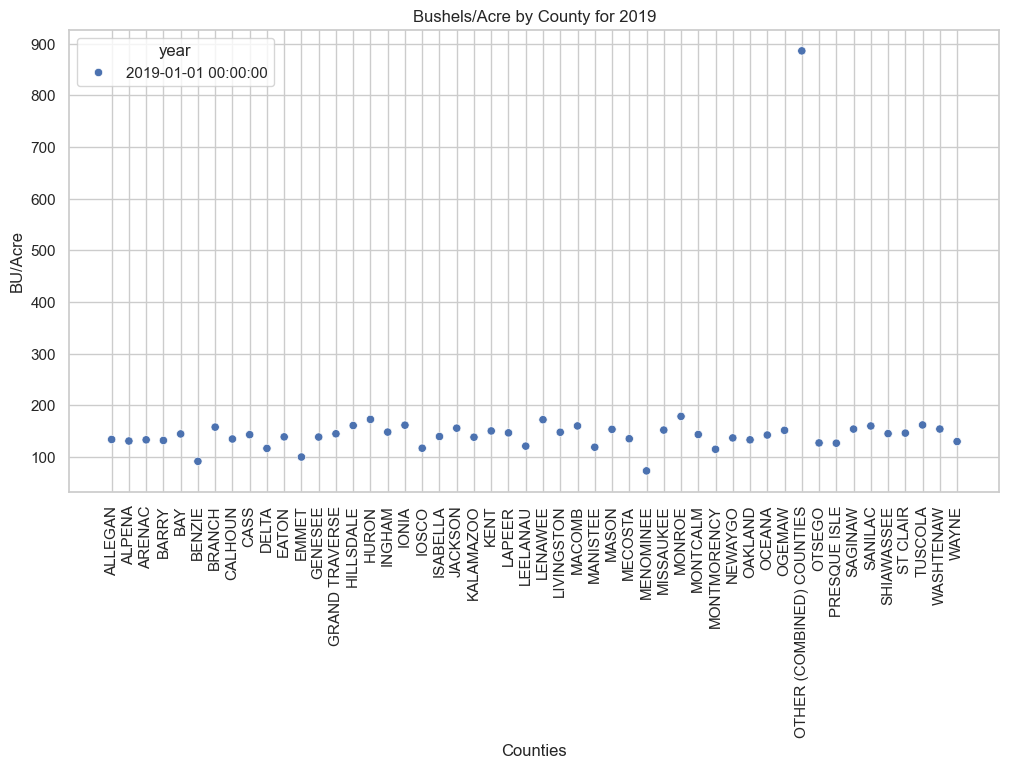

In [246]:
# Adjust figure size for better readability
plt.figure(figsize=(12, 6))

# Create the scatter plot
g = sns.scatterplot(data=grouped_df_2019, x="county_name", y="sum", hue="year")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Counties')
plt.ylabel('BU/Acre')
plt.title('Bushels/Acre by County for 2019')

# Adjust the legend positioning
#g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# Display the plot
plt.show()

The rest of the counties for 2019 produced no more than 200 bushels/acre. As expected, "OTHER (COMBINED) COUNTIES" is the highest in the chart.

In [247]:
# GDD calculation function
def calculate_gdd(df, base_temp=50, upper_temp=86):
    """
    Calculate Growing Degree Days (GDD) for corn.
    """
    df['TMAX'] = df['TMAX'].clip(lower=base_temp, upper=upper_temp)
    df['TMIN'] = df['TMIN'].clip(lower=base_temp)
    df['TAVG'] = (df['TMAX'] + df['TMIN']) / 2
    df['GDD'] = df['TAVG'] - base_temp
    return df

In [248]:
weather = calculate_gdd(weather)

In [249]:
# Compare average yield for usda_data_1955 and usda_data_2015
usda_1955 = pd.read_csv('data/usda_data_1955.csv')
usda_2015 = pd.read_csv('data/usda_data_2015.csv')

usda_1955['Value'].mean(), usda_2015['Value'].mean()

# whats the std deviation of yield for those years
usda_1955['Value'].std(), usda_2015['Value'].std()


(np.float64(13.073795653570846), np.float64(24.464792513092227))

In [250]:
# Compare total gdd for weather_data_1955 and weather_data_2015 for county_ansi=161
weather_2014 = pd.read_csv('data/weather_data_2014.csv')
weather_2023 = pd.read_csv('data/weather_data_2023.csv')

weather_2014 = calculate_gdd(weather_2014)
weather_2023 = calculate_gdd(weather_2023)

weather_2014[weather_2014['county_ansi'] == 161]['GDD'].sum(), weather_2023[weather_2023['county_ansi'] == 161]['GDD'].sum()

# Do this for all years between 1950 and 1959
gdd = []
for year in range(1950, 1960):
    weather = pd.read_csv(f'data/weather_data_{year}.csv')
    weather = calculate_gdd(weather)
    gdd.append(weather[weather['county_ansi'] == 161]['GDD'].sum())

gdd


[np.float64(2327.0),
 np.float64(2495.5),
 np.float64(2726.5),
 np.float64(2707.0),
 np.float64(2592.5),
 np.float64(1383.0),
 np.float64(2510.5),
 np.float64(2611.5),
 np.float64(2563.0),
 np.float64(2879.0)]

In [251]:
# Combine all weather data into a single DataFrame
weather_data = pd.concat([pd.read_csv(f'data/weather_data_{year}.csv') for year in range(1990, 2024)])
# Calculate GDD for each day
weather_data = calculate_gdd(weather_data)
weather_data


,date,TMAX,TMIN,PRCP,state_ansi,county_ansi,TAVG,GDD
0,1990-05-15,62.637795,50.000000,0.160258,26,NaN,56.318898,6.318898
1,1990-05-16,64.220472,50.627907,0.652994,26,NaN,57.424190,7.424190
2,1990-05-17,64.472727,50.000000,0.381364,26,NaN,57.236364,7.236364
3,1990-06-15,79.204918,52.704918,0.024408,26,NaN,65.954918,15.954918
4,1990-06-16,77.893443,55.590164,0.092333,26,NaN,66.741803,16.741803
...,...,...,...,...,...,...,...,...
8752,2023-07-17,NaN,NaN,0.148785,26,NaN,NaN,NaN
8753,2023-08-16,76.476744,53.632184,0.093815,26,NaN,65.054464,15.054464
8754,2023-08-17,NaN,NaN,0.161421,26,NaN,NaN,NaN
8755,2023-09-16,71.023392,50.000000,0.021863,26,NaN,60.511696,10.511696


In [252]:
# Convert 'date' to datetime if it's not already
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Extract year and month
weather_data['year'] = weather_data['date'].dt.year
weather_data['month'] = weather_data['date'].dt.month

# Aggregate GDD by county and year
gdd_annual = weather_data.groupby(['state_ansi', 'county_ansi', 'year'])['GDD'].sum().reset_index()
gdd_annual


,state_ansi,county_ansi,year,GDD
0,26,1.0,1998,2179.00
1,26,1.0,2002,2294.50
2,26,1.0,2003,1945.00
3,26,1.0,2005,2358.75
4,26,1.0,2009,1633.75
...,...,...,...,...
1986,26,165.0,2015,2149.50
1987,26,165.0,2016,2419.00
1988,26,165.0,2020,2273.75
1989,26,165.0,2021,2396.00


In [253]:
# Combine all USDA data into a single DataFrame usda_data
usda_data = pd.concat([pd.read_csv(f'data/usda_data_{year}.csv') for year in range(1990, 2024)])

In [254]:
# I added some lines to clean the data, most files are fine but I am looking for the 'YIELD' data and skipping any suppressed data

# Filter for the relevant data (e.g., 'YIELD' in 'statisticcat_desc')
corn_data = usda_data[usda_data['statisticcat_desc'] == 'YIELD']

# Convert 'Value' to numeric, removing any commas or missing values
corn_data['Value'] = corn_data['Value'].replace(',', '', regex=True)
corn_data = corn_data[corn_data['Value'] != '(D)']  # Remove suppressed data
corn_data['Value'] = pd.to_numeric(corn_data['Value'])

# Select relevant columns
corn_data = corn_data[['state_ansi', 'county_ansi', 'year', 'Value', 'county_name']]


In [255]:
# Merge the GDD and corn yield data to make a single DataFrame

# Merge on 'state_ansi', 'county_ansi', and 'year'
merged_data = pd.merge(gdd_annual, corn_data, on=['state_ansi', 'county_ansi', 'year'])
# Remove entries with zero or NaN yields
merged_data = merged_data[merged_data['Value'] > 0]
# Remove entries with zero or NaN yields
merged_data = merged_data[merged_data['GDD'] > 0]



In [256]:
# Dump merged_data to csv to test
#merged_data.to_csv('merged_data.csv', index=False)

In [257]:
merged_data['Value'].describe()

count    1926.000000
mean      124.215369
std        29.892226
min        36.000000
25%       104.300000
50%       123.600000
75%       147.475000
max       213.000000
Name: Value, dtype: float64

In [258]:
merged_data['GDD'].describe()

count    1926.000000
mean     2343.160336
std       363.749580
min        73.500000
25%      2153.125000
50%      2371.875000
75%      2582.875000
max      3302.516667
Name: GDD, dtype: float64

/var/folders/gk/1p2t95sn7lg8hfdvpn3q2_840000gn/T/ipykernel_44699/374902584.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(merged_data['GDD'], labels=[''])
/var/folders/gk/1p2t95sn7lg8hfdvpn3q2_840000gn/T/ipykernel_44699/374902584.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(merged_data['Value'], labels=[''])


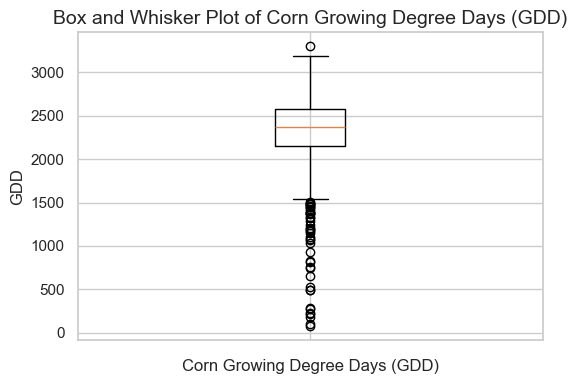

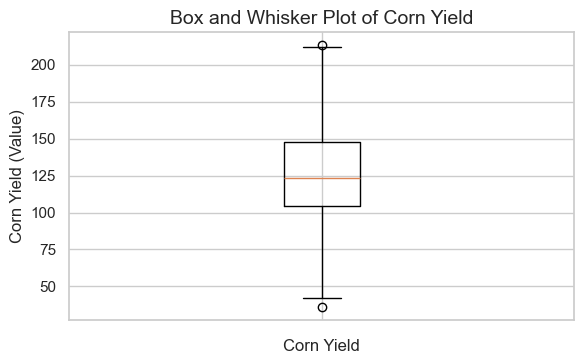

In [259]:
# Updated plot without the '1' on the x-axis

# Plot for 'GDD'
plt.figure(figsize=(6, 4))
plt.boxplot(merged_data['GDD'], labels=[''])
plt.title('Box and Whisker Plot of Corn Growing Degree Days (GDD)', fontsize=14)
plt.ylabel('GDD', fontsize=12)
plt.xlabel('Corn Growing Degree Days (GDD)', fontsize=12)
plt.grid(True)

# Plot for 'Value'
plt.figure(figsize=(6, 4))
plt.boxplot(merged_data['Value'], labels=[''])
plt.title('Box and Whisker Plot of Corn Yield', fontsize=14)
plt.ylabel('Corn Yield (Value)', fontsize=12)
plt.xlabel('Corn Yield', fontsize=12)
plt.grid(True)

# Adjusting layout for a clean look
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [260]:
# Calculate IQR for 'GDD' and 'Value' columns to identify outliers
Q1_GDD = merged_data['GDD'].quantile(0.25)
Q3_GDD = merged_data['GDD'].quantile(0.75)
IQR_GDD = Q3_GDD - Q1_GDD

Q1_Value = merged_data['Value'].quantile(0.25)
Q3_Value = merged_data['Value'].quantile(0.75)
IQR_Value = Q3_Value - Q1_Value

# Define bounds for outliers in 'GDD' and 'Value'
lower_bound_GDD = Q1_GDD - 1.5 * IQR_GDD
upper_bound_GDD = Q3_GDD + 1.5 * IQR_GDD

lower_bound_Value = Q1_Value - 1.5 * IQR_Value
upper_bound_Value = Q3_Value + 1.5 * IQR_Value

# Filter out the outliers
merged_data = merged_data[
    (merged_data['GDD'] >= lower_bound_GDD) & (merged_data['GDD'] <= upper_bound_GDD) &
    (merged_data['Value'] >= lower_bound_Value) & (merged_data['Value'] <= upper_bound_Value)
]



In [261]:
merged_data['Value'].describe()

count    1880.000000
mean      124.319681
std        29.559839
min        42.500000
25%       105.000000
50%       123.600000
75%       147.300000
max       212.000000
Name: Value, dtype: float64

In [262]:
merged_data['GDD'].describe()

count    1880.000000
mean     2373.177384
std       297.087891
min      1536.500000
25%      2169.312500
50%      2380.083333
75%      2588.750000
max      3186.666667
Name: GDD, dtype: float64

In [263]:
# Dump merged_data to csv to test
merged_data.to_csv('merged_data.csv', index=False)

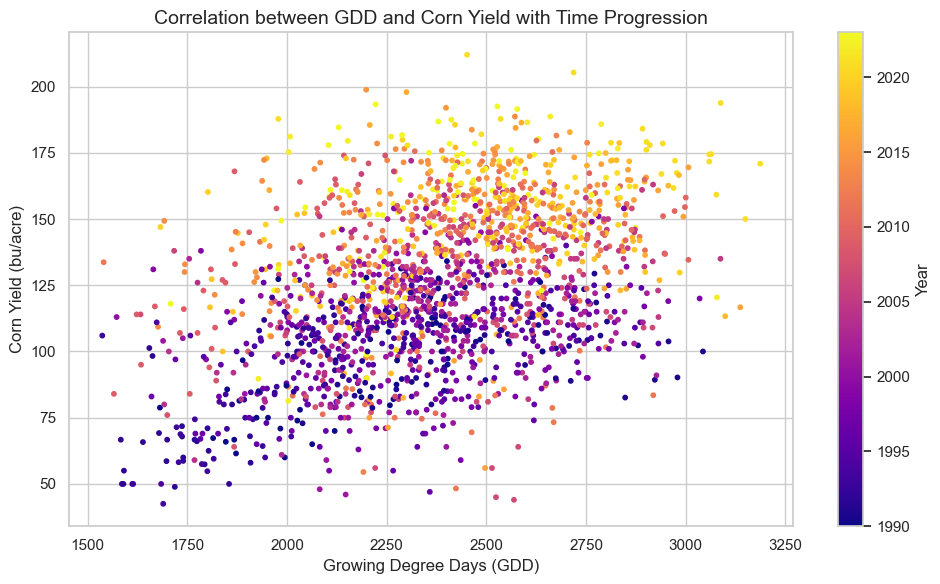

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with color gradient for time progression
plt.figure(figsize=(10, 6))

# Scatter plot with color mapped to 'year' and a plasma colormap for better color representation
scatter = plt.scatter(x=merged_data['GDD'], y=merged_data['Value'], c=merged_data['year'], cmap='plasma', s=10)

# Add colorbar to show year progression
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Set titles and labels
plt.title('Correlation between GDD and Corn Yield with Time Progression', fontsize=14)
plt.xlabel('Growing Degree Days (GDD)', fontsize=12)
plt.ylabel('Corn Yield (bu/acre)', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


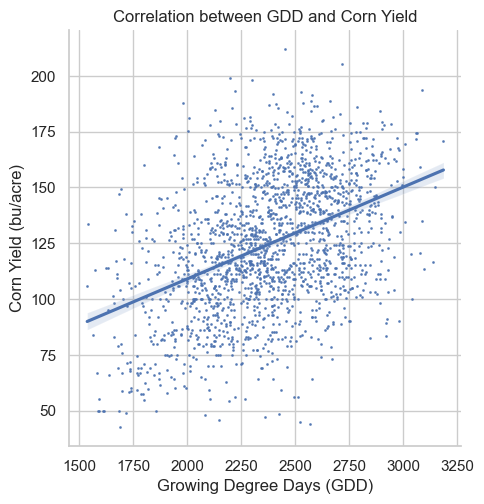

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of GDD vs. corn yield
sns.lmplot(x='GDD', y='Value', data=merged_data, scatter_kws={'s': 1})
plt.title('Correlation between GDD and Corn Yield')
plt.xlabel('Growing Degree Days (GDD)')
plt.ylabel('Corn Yield (bu/acre)')
plt.show()

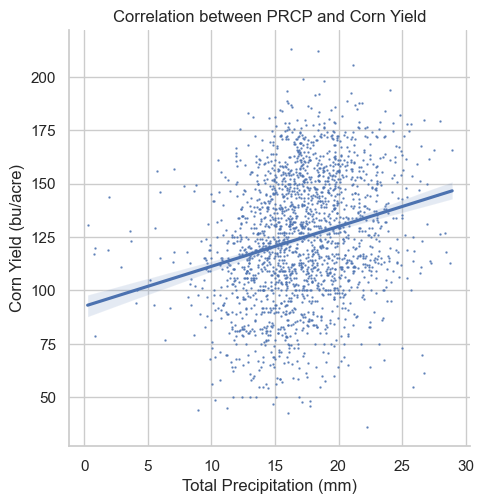

In [266]:
# Make the same chart with PRCP instead of GDD

# Calculate total precipitation for the growing season
weather_data['PRCP'] = weather_data['PRCP'].clip(lower=0)
prcp_annual = weather_data.groupby(['state_ansi', 'county_ansi', 'year'])['PRCP'].sum().reset_index()

# Merge on 'state_ansi', 'county_ansi', and 'year'
merged_data_prcp = pd.merge(prcp_annual, corn_data, on=['state_ansi', 'county_ansi', 'year'])
# Remove entries with zero or NaN yields
merged_data_prcp = merged_data_prcp[merged_data_prcp['Value'] > 0]
# Remove entries with zero or NaN yields
merged_data_prcp = merged_data_prcp[merged_data_prcp['PRCP'] > 0]

# Scatter plot with regression line
sns.lmplot(x='PRCP', y='Value', data=merged_data_prcp, scatter_kws={'s': 0.5})
plt.title('Correlation between PRCP and Corn Yield')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Corn Yield (bu/acre)')
plt.show()


In [267]:
# Add precipitation data to the merged dataframe
#prcp_annual = weather_data.groupby(['state_ansi', 'county_ansi', 'year'])['PRCP'].sum().reset_index()
#merged_data = pd.merge(merged_data, prcp_annual, on=['state_ansi', 'county_ansi', 'year'])


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     386.8
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.85e-78
Time:                        19:36:43   Log-Likelihood:                -8857.5
No. Observations:                1880   AIC:                         1.772e+04
Df Residuals:                    1878   BIC:                         1.773e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.7315      5.000      5.346      0.0

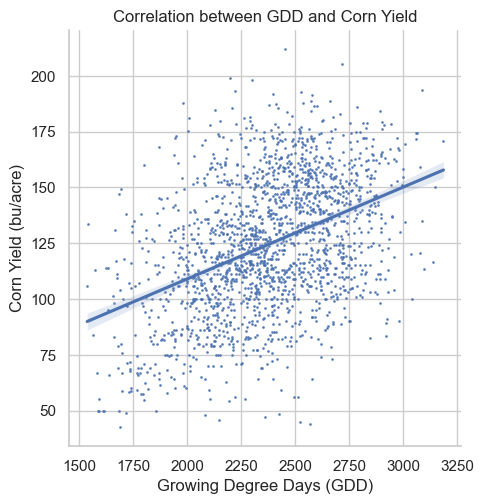

In [268]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the data for OLS (adding a constant for intercept)
X = sm.add_constant(merged_data['GDD'])  # Independent variable (GDD) with a constant
y = merged_data['Value']  # Dependent variable (Corn Yield)

# Step 2: Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Step 3: Print out the summary of the regression
print(ols_model.summary())

# Step 4: Plot the scatter plot with regression line (optional, already in your code)
sns.lmplot(x='GDD', y='Value', data=merged_data, scatter_kws={'s': 1})
plt.title('Correlation between GDD and Corn Yield')
plt.xlabel('Growing Degree Days (GDD)')
plt.ylabel('Corn Yield (bu/acre)')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     891.0
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          8.63e-273
Time:                        19:36:44   Log-Likelihood:                -8406.1
No. Observations:                1880   AIC:                         1.682e+04
Df Residuals:                    1877   BIC:                         1.683e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3444.0228    102.113    -33.727      0.0

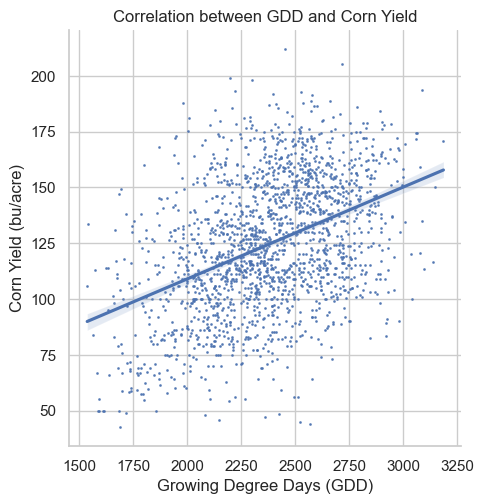

In [269]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the data for OLS (adding a constant for intercept)
X = merged_data[['GDD', 'year']]  # Independent variables (GDD and Year)
X = sm.add_constant(X)  # Add constant for the intercept
y = merged_data['Value']  # Dependent variable (Corn Yield)

# Step 2: Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Step 3: Print out the summary of the regression
print(ols_model.summary())

# Step 4: Plot the scatter plot with regression line for GDD (optional)
sns.lmplot(x='GDD', y='Value', data=merged_data, scatter_kws={'s': 1})
plt.title('Correlation between GDD and Corn Yield')
plt.xlabel('Growing Degree Days (GDD)')
plt.ylabel('Corn Yield (bu/acre)')
plt.show()


In [270]:
import statsmodels.api as sm

# Define independent variables and dependent variable
#X = merged_data[['GDD', 'PRCP']]
X = merged_data[['Value']]
y = merged_data['GDD']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    GDD   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     386.8
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.85e-78
Time:                        19:36:44   Log-Likelihood:                -13196.
No. Observations:                1880   AIC:                         2.640e+04
Df Residuals:                    1878   BIC:                         2.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1856.7934     26.986     68.806      0.0

In [271]:
# # Cleaning up 'Value' to make sure we have something to work with
# usda_data['Value'] = usda_data['Value'].replace(',', '', regex=True)
# usda_data['Value'] = usda_data['Value'].replace({'(D)': np.nan, '(Z)': np.nan, '(NA)': np.nan, '': np.nan})
# usda_data['Value'] = pd.to_numeric(usda_data['Value'], errors='coerce')

# # Filter for the relevant data (e.g., 'YIELD' in 'statisticcat_desc')
# corn_data = usda_data[usda_data['statisticcat_desc'] == 'YIELD']

# # Select relevant columns, including 'county_name'
# corn_data = corn_data[['state_ansi', 'county_ansi', 'year', 'Value', 'county_name']]

# # Drop rows with missing values in 'Value' or 'county_name'
# corn_data.dropna(subset=['Value', 'county_name'], inplace=True)

# # Ensure 'year' is integer
# corn_data['year'] = corn_data['year'].astype(int)


In [272]:
# #Merge on 'state_ansi', 'county_ansi', and 'year'
# merged_data = pd.merge(gdd_annual, corn_data, on=['state_ansi', 'county_ansi', 'year'])

# #Drop any rows with missing values
# merged_data.dropna(subset=['GDD', 'Value'], inplace=True)


In [273]:
merged_data

,state_ansi,county_ansi,year,GDD,Value,county_name
0,26,1.0,1998,2179.00,63.0,ALCONA
2,26,1.0,2003,1945.00,81.0,ALCONA
3,26,1.0,2005,2358.75,147.0,ALCONA
4,26,1.0,2009,1633.75,95.0,ALCONA
5,26,1.0,2011,2014.00,83.3,ALCONA
...,...,...,...,...,...,...
1986,26,165.0,2015,2149.50,132.2,WEXFORD
1987,26,165.0,2016,2419.00,96.5,WEXFORD
1988,26,165.0,2020,2273.75,100.6,WEXFORD
1989,26,165.0,2021,2396.00,136.4,WEXFORD


In [274]:
# # Calculate average yield per county
# avg_yield_per_county = merged_data.groupby(['county_ansi', 'county_name'])['Value'].mean().reset_index()

# # Sort and select top 5 counties
# top_counties = avg_yield_per_county.sort_values(by='Value', ascending=False).head(5)

# # Filter data for these counties
# top_county_codes = top_counties['county_ansi'].unique()
# top_county_names = top_counties['county_name'].unique()
# top_counties_data = merged_data[merged_data['county_ansi'].isin(top_county_codes)]


In [275]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # We can use a different plotting lib I just wnated something quick

# sns.set_style('whitegrid')
# num_counties = len(top_county_codes)
# fig, axes = plt.subplots(nrows=num_counties, ncols=1, figsize=(12, num_counties * 4), sharex=True)

# # Ensure axes is iterable
# if num_counties == 1:
#     axes = [axes]

# for ax, county_code, county_name in zip(axes, top_county_codes, top_county_names):
#     county_data = top_counties_data[top_counties_data['county_ansi'] == county_code]
#     county_data = county_data.sort_values('year')

#     # Plot Yield
#     ax.plot(county_data['year'], county_data['Value'], color='blue', marker='o', label='Corn Yield (bu/acre)')
#     ax.set_ylabel('Corn Yield (bu/acre)', color='blue')
#     ax.tick_params(axis='y', labelcolor='blue')

#     # Create a second y-axis for GDD
#     ax2 = ax.twinx()
#     ax2.plot(county_data['year'], county_data['GDD'], color='green', marker='x', label='GDD')
#     ax2.set_ylabel('GDD', color='green')
#     ax2.tick_params(axis='y', labelcolor='green')

#     # Title with county name
#     ax.set_title(f'Corn Yield and GDD Over Time - {county_name}')

#     # Add legends
#     lines, labels = ax.get_legend_handles_labels()
#     lines2, labels2 = ax2.get_legend_handles_labels()
#     ax.legend(lines + lines2, labels + labels2, loc='upper left')

# # Set common x-label
# plt.xlabel('Year')
# plt.tight_layout()
# plt.show()


In [276]:
# Calculate the average yield per county over the entire period
average_yield = merged_data.groupby('county_name')['Value'].mean().reset_index()

# Sort counties by average yield in descending order
average_yield_sorted = average_yield.sort_values(by='Value', ascending=False)

# Top 10 counties
print("Top 10 Counties by Average Corn Yield:")
print(average_yield_sorted.head(10))


Top 10 Counties by Average Corn Yield:
   county_name       Value
60     SANILAC  151.950000
23       HURON  151.500000
64     TUSCOLA  147.429412
46      MONROE  146.614706
35     LENAWEE  146.155882
5          BAY  143.856667
59     SAGINAW  142.973529
44     MIDLAND  141.678788
16       EATON  139.959375
24      INGHAM  137.967647


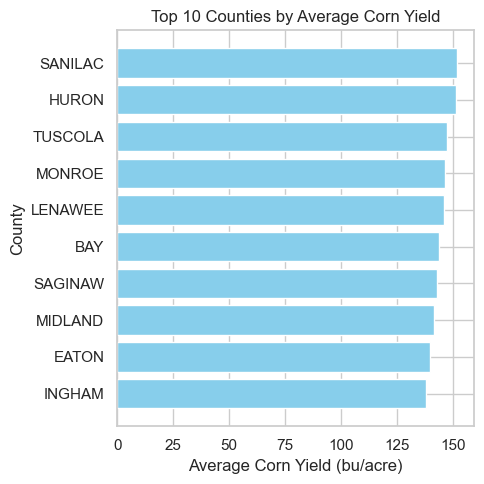

In [277]:
# Horizontal bar plot of average yields for top 10 counties in reverse order
plt.figure(figsize=(5, 5))
plt.barh(average_yield_sorted['county_name'].head(10)[::-1], average_yield_sorted['Value'].head(10)[::-1], color='skyblue')
plt.ylabel('County')
plt.xlabel('Average Corn Yield (bu/acre)')
plt.title('Top 10 Counties by Average Corn Yield')
plt.tight_layout()
plt.show()


In [278]:
# I was wondering if we pick the best based how consistent are they in beating the state average

# Calculate the state average yield for each year
state_average_yield = merged_data.groupby('year')['Value'].mean().reset_index(name='state_avg_yield')

# Merge state average back into merged_data
merged_data_with_state_avg = pd.merge(merged_data, state_average_yield, on='year')

# Create a flag for whether the county's yield is above the state average each year
merged_data_with_state_avg['above_state_avg'] = merged_data_with_state_avg['Value'] > merged_data_with_state_avg['state_avg_yield']

# Calculate the percentage of years each county was above the state average
county_performance = merged_data_with_state_avg.groupby('county_name')['above_state_avg'].mean().reset_index()

# Convert to percentage
county_performance['percent_above_state_avg'] = county_performance['above_state_avg'] * 100

# Sort counties by percentage in descending order
county_performance_sorted = county_performance.sort_values(by='percent_above_state_avg', ascending=False)

# Display the top 10 counties
print("Top 10 Counties by Consistency in Exceeding State Average Yield:")
print(county_performance_sorted.head(10))


Top 10 Counties by Consistency in Exceeding State Average Yield:
   county_name  above_state_avg  percent_above_state_avg
25       IONIA         1.000000               100.000000
60     SANILAC         1.000000               100.000000
59     SAGINAW         1.000000               100.000000
64     TUSCOLA         0.970588                97.058824
23       HURON         0.969697                96.969697
5          BAY         0.966667                96.666667
21     GRATIOT         0.965517                96.551724
44     MIDLAND         0.939394                93.939394
16       EATON         0.937500                93.750000
46      MONROE         0.911765                91.176471


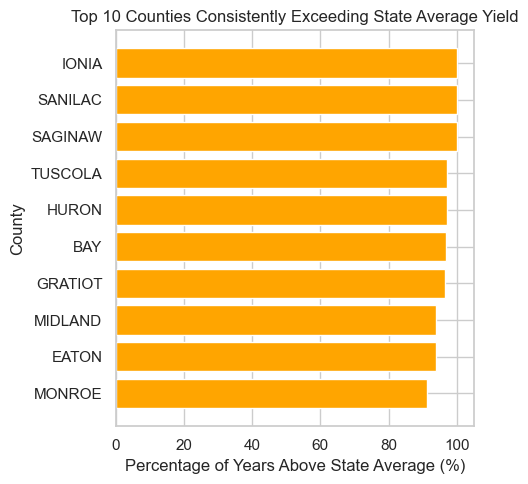

In [279]:
# Horizontal bar plot of top 10 counties by percentage of years above state average in reverse order
plt.figure(figsize=(5, 5))
plt.barh(county_performance_sorted['county_name'].head(10)[::-1], county_performance_sorted['percent_above_state_avg'].head(10)[::-1], color='orange')
plt.ylabel('County')
plt.xlabel('Percentage of Years Above State Average (%)')
plt.title('Top 10 Counties Consistently Exceeding State Average Yield')
plt.tight_layout()
plt.show()


In [280]:
# What about finding the best improved county over time wiht slope

# Pulling this in for linregress regression
from scipy.stats import linregress

# Prepare a DataFrame to store slopes
county_slopes = []

for county in merged_data['county_name'].unique():
    county_data = merged_data[merged_data['county_name'] == county]
    if len(county_data['year'].unique()) > 1:  # Ensure there's enough data
        slope, intercept, r_value, p_value, std_err = linregress(county_data['year'], county_data['Value'])
        county_slopes.append({'county_name': county, 'slope': slope, 'p_value': p_value})
    else:
        county_slopes.append({'county_name': county, 'slope': np.nan, 'p_value': np.nan})

# Convert to DataFrame
slopes_df = pd.DataFrame(county_slopes)

# Remove counties with NaN slopes
slopes_df.dropna(subset=['slope'], inplace=True)

# Sort counties by slope
slopes_df_sorted = slopes_df.sort_values(by='slope', ascending=False)

print("Top 10 Counties by Yield Improvement Over Time:")
print(slopes_df_sorted.head(10))


Top 10 Counties by Yield Improvement Over Time:
   county_name      slope       p_value
40   MARQUETTE  11.500000  3.333333e-01
62     SANILAC   2.781469  2.665583e-11
7      BERRIEN   2.565182  4.425141e-13
65   VAN BUREN   2.481082  1.156690e-05
23       HURON   2.411319  1.824526e-09
33      LAPEER   2.346702  1.810290e-10
41       MASON   2.340914  2.739279e-04
64     TUSCOLA   2.326662  5.639995e-10
0       ALCONA   2.309704  8.064006e-02
60    ST CLAIR   2.308526  4.041439e-12


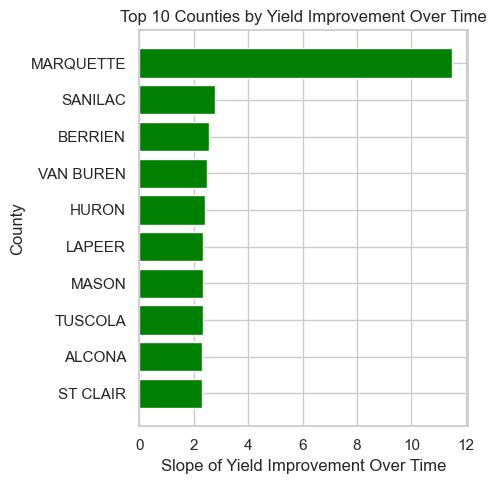

In [281]:
# Horizontal bar plot of top 10 counties by yield improvement over time (slope)
plt.figure(figsize=(5, 5))
plt.barh(slopes_df_sorted['county_name'].head(10)[::-1], slopes_df_sorted['slope'].head(10)[::-1], color='green')
plt.ylabel('County')
plt.xlabel('Slope of Yield Improvement Over Time')
plt.title('Top 10 Counties by Yield Improvement Over Time')
plt.tight_layout()
plt.show()


In [282]:
# Lets looks at the counties that have been the most consistent in their yield over time

# Calculate standard deviation of yield per county
yield_variability = merged_data.groupby('county_name')['Value'].std().reset_index(name='yield_std')

# Sort counties by yield_std in ascending order
yield_variability_sorted = yield_variability.sort_values(by='yield_std')

print("Top 10 Counties with Least Yield Variability:")
print(yield_variability_sorted.head(10))


Top 10 Counties with Least Yield Variability:
   county_name  yield_std
40   MARQUETTE  13.279056
63   ST JOSEPH  16.283870
55      OSCODA  18.299772
30    KALKASKA  18.705415
34    LEELANAU  19.403906
67       WAYNE  19.555519
42     MECOSTA  19.677621
11  CHARLEVOIX  20.406063
21     GRATIOT  20.571288
68     WEXFORD  20.970823


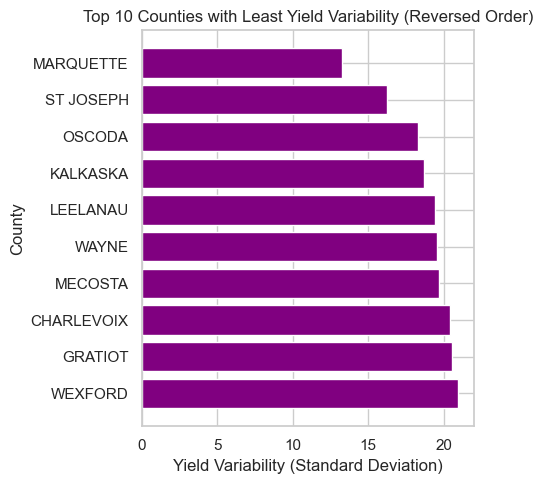

In [283]:
# Horizontal bar plot of top 10 counties with least yield variability (standard deviation)
plt.figure(figsize=(5, 5))
plt.barh(yield_variability_sorted['county_name'].head(10)[::-1], yield_variability_sorted['yield_std'].head(10)[::-1], color='purple')
plt.ylabel('County')
plt.xlabel('Yield Variability (Standard Deviation)')
plt.title('Top 10 Counties with Least Yield Variability (Reversed Order)')
plt.tight_layout()
plt.show()


In [284]:
# Lets look at the counties with the highest average gdd

# Calculate average GDD per county
avg_gdd_per_county = merged_data.groupby('county_name')['GDD'].mean().reset_index()

# Sort counties by average GDD in descending order
avg_gdd_per_county_sorted = avg_gdd_per_county.sort_values(by='GDD', ascending=False)

print("Top 10 Counties by Average Growing Degree Days:")
print(avg_gdd_per_county_sorted.head(10))


Top 10 Counties by Average Growing Degree Days:
   county_name          GDD
67       WAYNE  2817.643333
29   KALAMAZOO  2739.234375
46      MONROE  2684.500735
7      BERRIEN  2657.712500
35     LENAWEE  2614.914216
66   WASHTENAW  2613.451803
9      CALHOUN  2589.811275
63   ST JOSEPH  2584.625000
62    ST CLAIR  2565.791667
38      MACOMB  2562.727696


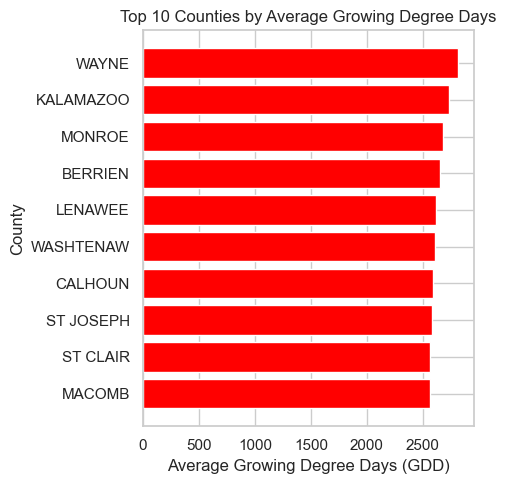

In [285]:
# Horizontal bar plot of top 10 counties by average GDD
plt.figure(figsize=(5, 5))
plt.barh(avg_gdd_per_county_sorted['county_name'].head(10)[::-1], avg_gdd_per_county_sorted['GDD'].head(10)[::-1], color='red')
plt.ylabel('County')
plt.xlabel('Average Growing Degree Days (GDD)')
plt.title('Top 10 Counties by Average Growing Degree Days')
plt.tight_layout()
plt.show()


In [286]:
# Normalize the average GDD
#county_metrics['GDD_norm'] = scaler.fit_transform(county_metrics[['GDD']])


In [287]:
# Use county_name to merge all the other DFs
county_metrics = average_yield[['county_name', 'Value']].merge(
    county_performance[['county_name', 'percent_above_state_avg']], on='county_name').merge(
    yield_variability[['county_name', 'yield_std']], on='county_name').merge(
    avg_gdd_per_county[['county_name', 'GDD']], on='county_name')

# Normalize the metrics
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

county_metrics[['avg_yield_norm', 'percent_above_avg_norm', 'yield_std_norm', 'avg_gdd_per_county']] = scaler.fit_transform(
    county_metrics[['Value', 'percent_above_state_avg', 'yield_std', 'GDD']])

# Invert yield_std_norm so that lower variability scores higher
county_metrics['yield_std_norm'] = 1 - county_metrics['yield_std_norm']

# I assigned weights to each metric but nothing scientific
# Should come back to this later
county_metrics['total_score'] = (
    county_metrics['avg_yield_norm'] * 0.4 +
    county_metrics['percent_above_avg_norm'] * 0.3 +
    county_metrics['yield_std_norm'] * 0.1 +
    county_metrics['avg_gdd_per_county'] * 0.1
)

# Sort counties by total_score
county_metrics_sorted = county_metrics.sort_values(by='total_score', ascending=False)

print("Top 10 Counties by Composite Score:")
print(county_metrics_sorted[['county_name', 'total_score']].head(10))


Top 10 Counties by Composite Score:
   county_name  total_score
59     SAGINAW     0.788039
60     SANILAC     0.770903
5          BAY     0.770807
46      MONROE     0.770772
64     TUSCOLA     0.765964
21     GRATIOT     0.760335
25       IONIA     0.760083
23       HURON     0.758696
16       EATON     0.754298
35     LENAWEE     0.753234


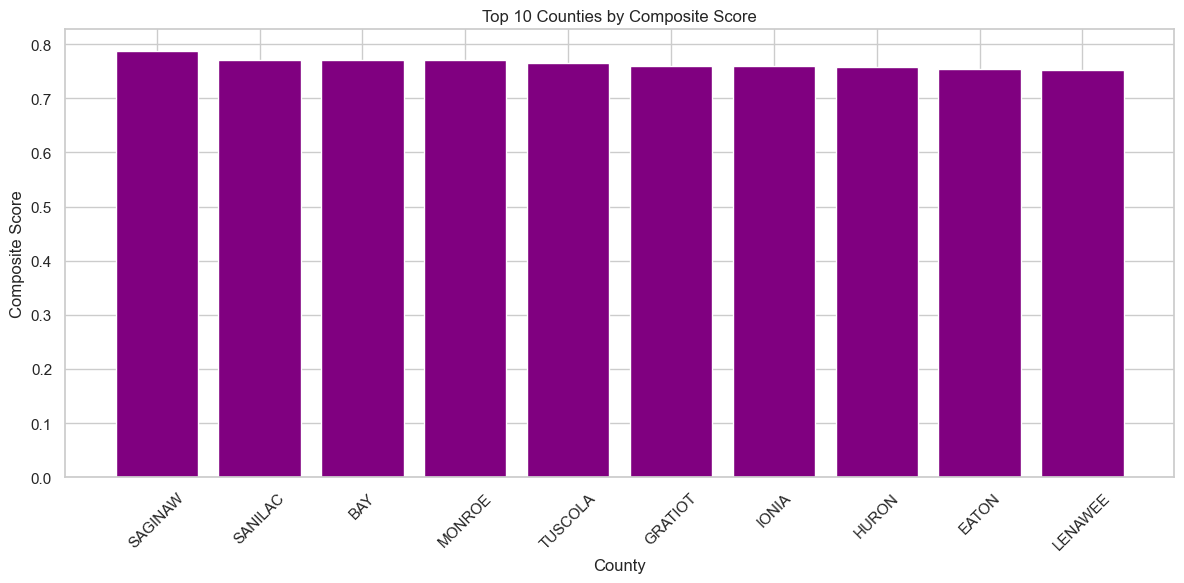

In [288]:
# Bar plot of top 10 counties by composite score
plt.figure(figsize=(12, 6))
plt.bar(county_metrics_sorted['county_name'].head(10), county_metrics_sorted['total_score'].head(10), color='purple')
plt.xticks(rotation=45)
plt.xlabel('County')
plt.ylabel('Composite Score')
plt.title('Top 10 Counties by Composite Score')
plt.tight_layout()
plt.show()


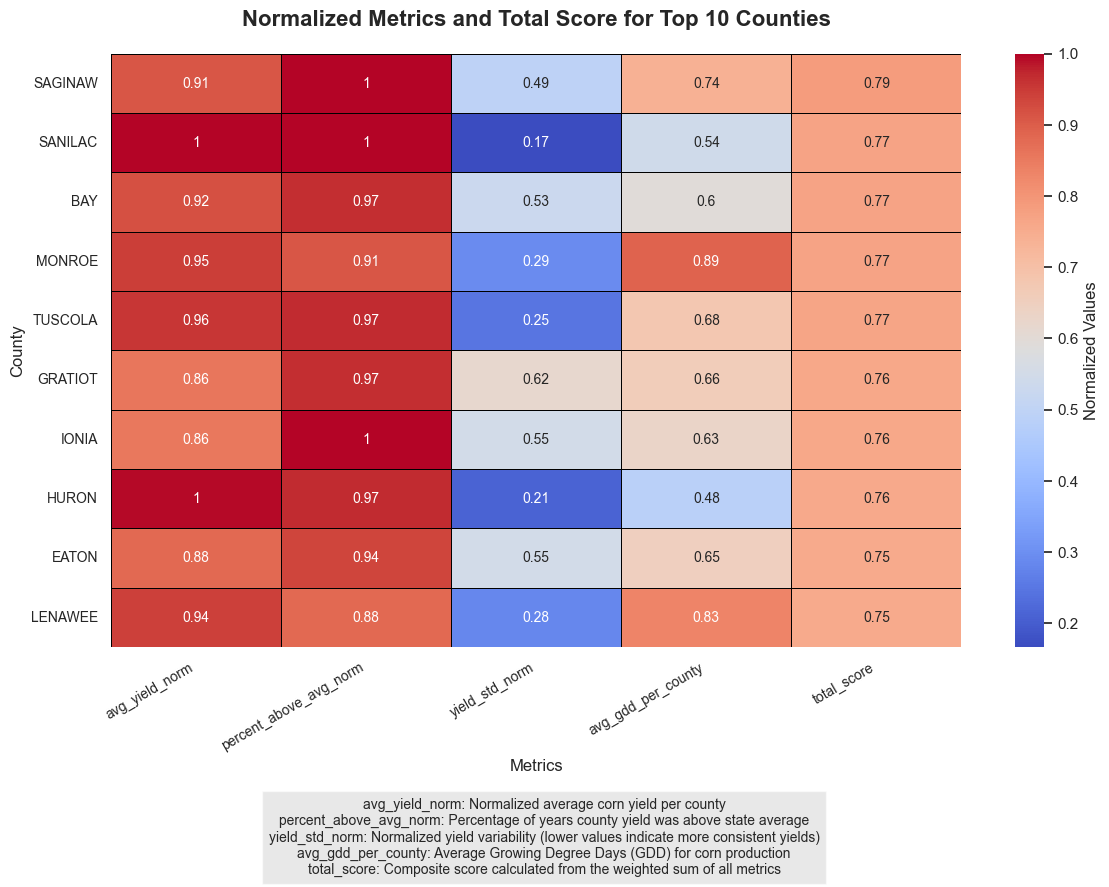

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for heatmap
metrics_for_heatmap = county_metrics_sorted[['county_name', 'avg_yield_norm', 'percent_above_avg_norm', 'yield_std_norm', 'avg_gdd_per_county', 'total_score']].set_index('county_name')

# Set a larger and professional style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot heatmap with enhancements
heatmap = sns.heatmap(metrics_for_heatmap.head(10), 
                      annot=True, 
                      cmap='coolwarm',  # More polished colormap
                      linewidths=0.5,   # Add gridlines
                      linecolor='black', # Gridline color
                      annot_kws={"size": 10},  # Annotation text size
                      cbar_kws={'label': 'Normalized Values'})  # Label the color bar

# Enhance title and axis labels
plt.title('Normalized Metrics and Total Score for Top 10 Counties', fontsize=16, weight='bold', pad=20)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('County', fontsize=12)

# Add a descriptive legend for x-axis values
plt.figtext(0.46, -0.1,
            'avg_yield_norm: Normalized average corn yield per county\n'
            'percent_above_avg_norm: Percentage of years county yield was above state average\n'
            'yield_std_norm: Normalized yield variability (lower values indicate more consistent yields)\n'
            'avg_gdd_per_county: Average Growing Degree Days (GDD) for corn production\n'
            'total_score: Composite score calculated from the weighted sum of all metrics',
            ha='center', fontsize=10, wrap=True, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

# Adjust layout for better spacing
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the heatmap
plt.show()
